<a href="https://colab.research.google.com/github/eduardamota/curso-eba/blob/main/teste_hipotese_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de Hipótese - Média

**Exemplo:** Em corrida de carros, o pit stop é o local em que um veículo vai para trocar pneus, abastecer, efetuar reparos e outros ajustes mecânicos. A eficiência de uma equipe que realiza esses ajustes pode afetar o resultado de uma corrida. Uma equipe afirma que o seu tempo médio no pit stop (para 4 trocas de pneus e abastecimento) é menor que 13 segundos. Uma amostra aleatória de 32 temos de pit stop tem uma média de 12,9 segundos. Suponha que o desvio padrão populacional é de 0,19 segundos. Há evidência suficiente para concordar com a afirmação com 99% de confiança?

In [7]:
#dados
alpha = 0.99
significancia = 1 - alpha
n = 32
desvio = 0.19
mi = 13
x = 12.9

In [8]:
import numpy as np

z  = (x - mi) / (desvio/np.sqrt(n))
z

-2.977291710259137

In [9]:
from scipy.stats import norm
# Para um teste de uma cauda, usa-se a função ppf com 1 - alfa
z_critico_uma_cauda = norm.ppf(1 - alpha)
z_critico_uma_cauda

-2.3263478740408408

In [10]:
z_critico_uma_cauda > z

True

Com o nível de significância de 1% temos envidências para rejeitar a hipótese que o pit stop é maior que 13 segundos. Logo, concordamos com a afirmação que é menor que 13s.

In [11]:
p_valor = norm.cdf(z)
p_valor

0.0014540358484991462

In [12]:
# Caso eu tenha um dataframe posso usar a seguinte a bibloteca do statsmodels e o módulo ztest

'''
  from statsmodels.stats.weightstats import ztest as ztest
  #coluna com dados
  data = df ["amostras"]
  ztest(data, value=100) #value é o valor que eu quero comparar

  o resulta será o p valor
'''


'\n  from statsmodels.stats.weightstats import ztest as ztest\n  #coluna com dados\n  data = df ["amostras"]\n  ztest(data, value=100) #value é o valor que eu quero comparar\n\n  o resulta será o p valor\n'

## Teste de Hipótese - Média
**Desvio padrão desconhecido**


**Exemplo:** Em corrida de carros, o pit stop é o local em que um veículo vai para trocar pneus, abastecer, efetuar reparos e outros ajustes mecânicos. A eficiência de uma equipe que realiza esses ajustes pode afetar o resultado de uma corrida. Uma equipe afirma que o seu tempo médio no pit stop (para 4 trocas de pneus e abastecimento) é menor que 13 segundos. Uma amostra aleatória de 32 temos de pit stop tem uma média de 12,9 segundos. Suponha que o desvio padrão amostral é de 0,4 segundos. Há evidência suficiente para concordar com a afirmação com 99% de confiança?

In [13]:
import scipy.stats
t = (12.9-13)/(0.4/(32**0.5))
dof=32-1

p_valor = scipy.stats.t.sf(abs(t),df=dof)
p_valor*100

8.363231544793761

O p-valor é maior que meu nível de significância, logo temos evidências para aceita a hipótese nula. Logo, falamso que a troca é maior ou igual a 13s.

In [14]:
'''
--- Caso tivesse trabalhando com um dataframe ---
from scipy import stats
value = 13 #valor comparado
result = stats.ttest_lsamp(df["amostra"],value)
print(result.pvalue)
'''

'\n--- Caso tivesse trabalhando com um dataframe ---\nfrom scipy import stats\nvalue = 13 #valor comparado\nresult = stats.ttest_lsamp(df["amostra"],value)\nprint(result.pvalue)\n'

### Teste de Hipótese para duas amostras
- Duas amostras são **independentes** quando a amostra selecionada de uma população não é relacionada a segunda a amostra.
- Duas amostras são **dependentes** quando cada elemento de uma amostra corresponde a um elemento da outra amostra. Essas amostras também são chamadas de amostras pareadas ou amostras emparelhadas.

##### Desvio padrão populacional conhecido e amostras independentes 

In [15]:
'''
--- Caso tivesse trabalhando com um dataframe ---
from statsmodels.stats.weightstats import zteste as ztest

#especifique as colunas que quer comparar
cityA = df["A"]
cityB = df["B"]

#Rodando o teste
ztest(cityA, cityB)
'''

'\n--- Caso tivesse trabalhando com um dataframe ---\nfrom statsmodels.stats.weightstats import zteste as ztest\n\n#especifique as colunas que quer comparar\ncityA = df["A"]\ncityB = df["B"]\n\n#Rodando o teste\nztest(cityA, cityB)\n'

##### Desvio padrão populacional desconhecido e amostras independentes 
Exemplo: Os resultados de um teste estadual de matemática para amostras aleatórias de estudantes ensinados por dois professores diferentes na mesma escola. Podemos concluir que há diferença nas pontuações médias dos testes de matemática para todos os estudantes dos dois professores? Use confiança de 90%. Suponha que as populações são normalmente distribuídas e que as variâncias populacionais não são iguais. 

In [16]:
x1 = 473
s1 = 39.7
n1 = 8
x2 = 459
s2 = 24.5
n2 = 18

In [17]:
import scipy.stats as stats

# Nível de significância para 90% de confiança
alpha = 0.10

# Realizando o teste t de Welch (duas amostras independentes com variâncias desiguais)
t_statistic, p_value = stats.ttest_ind_from_stats(mean1=x1, std1=s1, nobs1=n1,
                                                  mean2=x2, std2=s2, nobs2=n2,
                                                  equal_var=False)

# Resultado do teste e decisão sobre a hipótese nula
p_value, p_value < alpha



(0.37924039002820076, False)

Não temos evidência suficiente para rejeitar a hipótese nula, ao nível de significância de 10%. Logo, concordamos com a afirmação de que as pontuações médias dos professores são diferentes.

### Intervalo de Confiança para diferença de médias

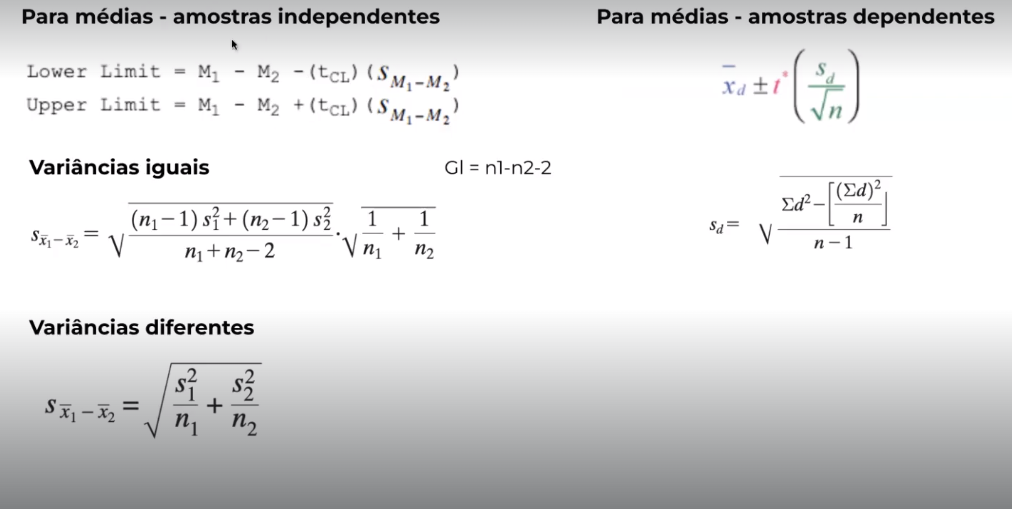

Exemplo: Os resultados de um teste estadual de matemática para amostras aleatórias de estudantes ensinados por dois professores diferentes na mesma escola. Podemos concluir que há diferença nas pontuações médias dos testes de matemática para todos os estudantes dos dois professores? Use confiança de 90%. Suponha que as populações são normalmente distribuídas e que as variâncias populacionais não são iguais. 

In [1]:
x1 = 473
s1 = 39.7
n1 = 8
x2 = 459
s2 = 24.5
n2 = 18

Se o intervalo de confiança passa pelo zero, dizemos que com 90% de confinaça que essas amostras são estatisticamente iguais.